In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file into a DataFrame
df = pd.read_csv('Rose.csv')

# Display the first few rows of the DataFrame
print(df.head())


  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0


In [2]:
len(df)

187

In [3]:
df

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
...,...,...
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0


In [4]:
data = df.copy()

In [5]:
# Convert 'YearMonth' to datetime
data['YearMonth'] = pd.to_datetime(data['YearMonth'])

# Check for NaN values in the 'Rose' column
nan_rows = data[data['Rose'].isna()]

# Extract the month and year from the rows with NaN values
nan_rows['Year'] = nan_rows['YearMonth'].dt.year
nan_rows['Month'] = nan_rows['YearMonth'].dt.month

# Display the months and years with NaN values
print(nan_rows[['Year', 'Month']])

     Year  Month
174  1994      7
175  1994      8


C:\Users\debaj\AppData\Local\Temp\ipykernel_13028\3576101469.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows['Year'] = nan_rows['YearMonth'].dt.year
C:\Users\debaj\AppData\Local\Temp\ipykernel_13028\3576101469.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows['Month'] = nan_rows['YearMonth'].dt.month


In [6]:
# Assuming there are NaN values in the 'Rose' column, fill them with zero
df['Rose'] = df['Rose'].fillna(0)

# Now df has no NaN values in the 'Rose' column, they are replaced with zero
print(df)

    YearMonth   Rose
0     1980-01  112.0
1     1980-02  118.0
2     1980-03  129.0
3     1980-04   99.0
4     1980-05  116.0
..        ...    ...
182   1995-03   45.0
183   1995-04   52.0
184   1995-05   28.0
185   1995-06   40.0
186   1995-07   62.0

[187 rows x 2 columns]


In [7]:
data = df.copy()

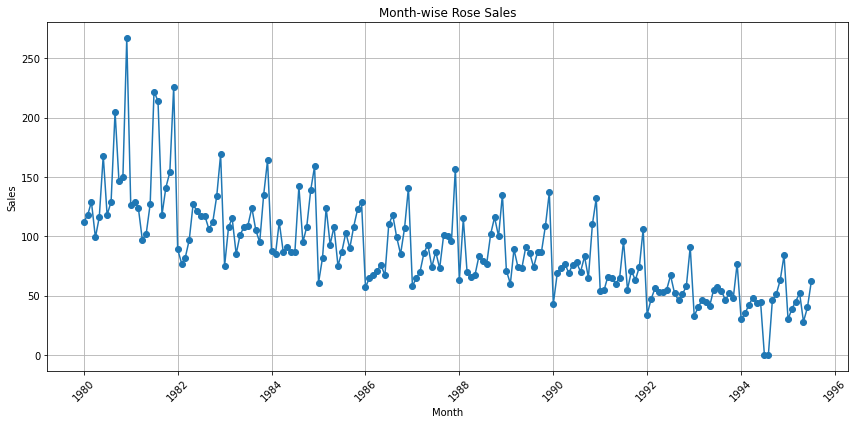

In [8]:
# Convert 'YearMonth' to datetime
data['YearMonth'] = pd.to_datetime(data['YearMonth'])

# Set 'YearMonth' as the index
data.set_index('YearMonth', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rose'], marker='o')
plt.title('Month-wise Rose Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [9]:
data = df.copy()

In [10]:
# Convert 'YearMonth' to datetime
data['YearMonth'] = pd.to_datetime(data['YearMonth'])

# Extract month from 'YearMonth'
data['Month'] = data['YearMonth'].dt.month

# Group by 'Month' and calculate the average
monthly_avg_sales = data.groupby('Month')['Rose'].mean().reset_index()

# Print the result
print(monthly_avg_sales)

    Month        Rose
0       1   64.000000
1       2   74.312500
2       3   81.875000
3       4   74.687500
4       5   78.062500
5       6   83.562500
6       7   91.375000
7       8   93.466667
8       9   93.333333
9      10   92.066667
10     11  106.666667
11     12  144.933333


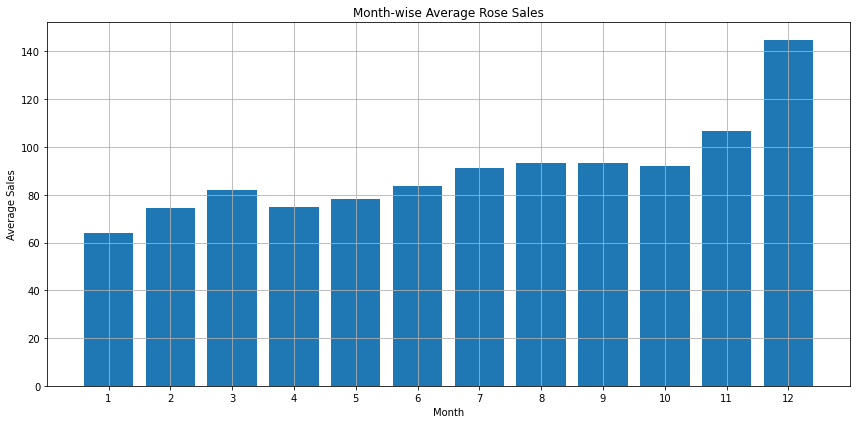

In [11]:
import matplotlib.pyplot as plt

# Plotting the month-wise average sales
plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_sales['Month'], monthly_avg_sales['Rose'])
plt.title('Month-wise Average Rose Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(monthly_avg_sales['Month'])  # Ensure all months are shown on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()


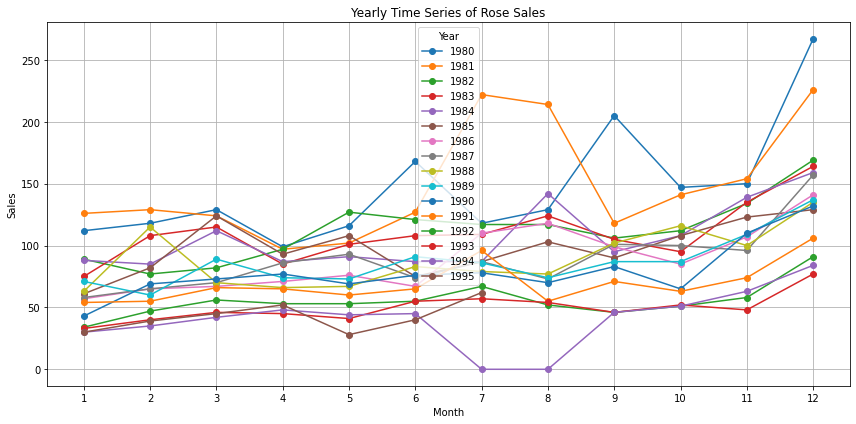

In [12]:
# Convert 'YearMonth' to datetime
data['YearMonth'] = pd.to_datetime(data['YearMonth'])

# Set 'YearMonth' as the index
data.set_index('YearMonth', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Assuming the data spans multiple years, we group by year and plot each group
for year, group in data.groupby(data.index.year):
    plt.plot(group.index.month, group['Rose'], marker='o', label=year)

plt.title('Yearly Time Series of Rose Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))  # Set x-ticks to be each month
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [14]:
data  = df.copy()

In [15]:
df

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
...,...,...
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0


In [16]:
df.isna().sum()

YearMonth    0
Rose         0
dtype: int64

In [38]:
data = df.copy()

In [39]:
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Rose'])
result

(-1.7159492779127397,
 0.4229142295348721,
 13,
 173,
 {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705},
 1532.120995909302)

In [18]:
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Rose'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[0] < result[4]["5%"]:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -1.715949
p-value: 0.422914
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
The time series is not stationary.


In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [20]:
data = df.copy()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


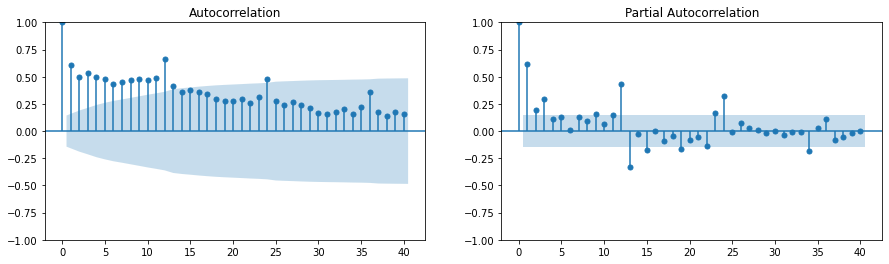

In [21]:
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(data['Rose'], lags=40, ax=axes[0])
plot_pacf(data['Rose'], lags=40, ax=axes[1])
plt.show()

## Single exponential smoothing

In [30]:
data = df.copy()

In [55]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
data = df.copy()

# 1. Single Exponential Smoothing
print("\nSingle Exponential Smoothing:")
ses_model = ExponentialSmoothing(data['Rose'], trend=None, seasonal=None).fit()
print(f"SES AIC: {ses_model.aic}")
print(ses_model.summary())
ses_forecast = ses_model.forecast(12)
# Print the forecast values
print("Simple Exponential Smoothing forecast:")
print(ses_forecast)


Single Exponential Smoothing:
SES AIC: 1256.68233582661
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                         151743.161
Optimized:                         True   AIC                           1256.682
Trend:                             None   BIC                           1263.145
Seasonal:                          None   AICC                          1256.902
Seasonal Periods:                  None   Date:                 Fri, 13 Sep 2024
Box-Cox:                          False   Time:                         14:00:37
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1164241                alph

In [56]:
data = df.copy()
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(data['Rose']).fit(smoothing_level=0.2)
ses_forecast = ses_model.forecast(12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
# Print the forecast values
print("Simple Exponential Smoothing forecast:")
print(ses_forecast)

Simple Exponential Smoothing forecast:
1995-08-01    46.042234
1995-09-01    46.042234
1995-10-01    46.042234
1995-11-01    46.042234
1995-12-01    46.042234
1996-01-01    46.042234
1996-02-01    46.042234
1996-03-01    46.042234
1996-04-01    46.042234
1996-05-01    46.042234
1996-06-01    46.042234
1996-07-01    46.042234
Freq: MS, dtype: float64


## Double exponential smoothing

In [40]:
data = df.copy()

In [53]:
# 2. Double Exponential Smoothing (Holt's Method)
print("\nDouble Exponential Smoothing (Holt's Method):")
holt_model = ExponentialSmoothing(data['Rose'], trend='add', seasonal=None).fit()
print(f"Holt AIC: {holt_model.aic}")
print(holt_model.summary())
holt_forecast = holt_model.forecast(12)
print("\nHolt's Linear Trend forecast:")
print(holt_forecast)


Double Exponential Smoothing (Holt's Method):
Holt AIC: 1246.702754706028
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                         140812.926
Optimized:                         True   AIC                           1246.703
Trend:                         Additive   BIC                           1259.627
Seasonal:                          None   AICC                          1247.169
Seasonal Periods:                  None   Date:                 Fri, 13 Sep 2024
Box-Cox:                          False   Time:                         13:59:22
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.1909e-07  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
data = df.copy()
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)
# Holt's Linear Trend method
holt_model = Holt(data['Rose']).fit(smoothing_level=0.2, smoothing_trend=0.2)
holt_forecast = holt_model.forecast(12)
holt_forecast

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1995-08-01    48.134875
1995-09-01    49.093110
1995-10-01    50.051345
1995-11-01    51.009580
1995-12-01    51.967815
1996-01-01    52.926051
1996-02-01    53.884286
1996-03-01    54.842521
1996-04-01    55.800756
1996-05-01    56.758991
1996-06-01    57.717226
1996-07-01    58.675461
Freq: MS, dtype: float64

## Triple Exponential smoothing

In [58]:
data = df.copy()

In [60]:
# 3. Triple Exponential Smoothing (Holt-Winters Method)
print("\nTriple Exponential Smoothing (Holt-Winters Method):")
holt_winters_model = ExponentialSmoothing(data['Rose'], trend='add', seasonal='add', seasonal_periods=12).fit()
print(f"Holt-Winters AIC: {holt_winters_model.aic}")
print(holt_winters_model.summary())
hw_forecast = holt_winters_model.forecast(12)


print("\nHolt-Winters' Seasonal forecast:")
print(hw_forecast)


Triple Exponential Smoothing (Holt-Winters Method):
Holt-Winters AIC: 1122.5131771397912
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          63750.346
Optimized:                         True   AIC                           1122.513
Trend:                         Additive   BIC                           1174.211
Seasonal:                      Additive   AICC                          1126.585
Seasonal Periods:                    12   Date:                 Fri, 13 Sep 2024
Box-Cox:                          False   Time:                         14:02:06
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level  

In [61]:
data = df.copy()
# Holt-Winters' Seasonal method - assuming a seasonal period of 12 months
hw_model = ExponentialSmoothing(data['Rose'], seasonal_periods=12, trend='add', seasonal='add').fit()
hw_forecast = hw_model.forecast(12)

print("\nHolt-Winters' Seasonal forecast:")
print(hw_forecast)


Holt-Winters' Seasonal forecast:
187    44.237989
188    44.110828
189    42.861000
190    57.474745
191    95.751319
192    11.259768
193    21.578052
194    29.157992
195    21.892876
196    25.333203
197    30.971119
198    38.682228
dtype: float64


In [ ]:
data = df.copy()

## Simple ,Double, Triple exponential

In [62]:
data = df.copy()

In [64]:
data = df.copy()

In [65]:
# 1. Single Exponential Smoothing (SES)
print("\nSingle Exponential Smoothing:")
ses_model = SimpleExpSmoothing(data['Rose']).fit(smoothing_level=0.2)  # Adjust smoothing_level as needed
print(f"SES AIC: {ses_model.aic}")
print(ses_model.summary())

# 2. Double Exponential Smoothing (Holt's Method)
print("\nDouble Exponential Smoothing (Holt's Method):")
holt_model = Holt(data['Rose']).fit(smoothing_level=0.8, smoothing_slope=0.2)  # Adjust parameters as needed
print(f"Holt AIC: {holt_model.aic}")
print(holt_model.summary())

# 3. Triple Exponential Smoothing (Holt-Winters Method)
print("\nTriple Exponential Smoothing (Holt-Winters Method):")
holt_winters_model = ExponentialSmoothing(
    data['Rose'], 
    trend='add', 
    seasonal='add', 
    seasonal_periods=12
).fit()  # Adjust parameters as needed
print(f"Holt-Winters AIC: {holt_winters_model.aic}")
print(holt_winters_model.summary())


Single Exponential Smoothing:
SES AIC: 1260.3418945701446
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   Rose   No. Observations:                  187
Model:             SimpleExpSmoothing   SSE                         154741.996
Optimized:                       True   AIC                           1260.342
Trend:                           None   BIC                           1266.804
Seasonal:                        None   AICC                          1260.562
Seasonal Periods:                None   Date:                 Fri, 13 Sep 2024
Box-Cox:                        False   Time:                         14:07:11
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha               

C:\Users\debaj\AppData\Local\Temp\ipykernel_13028\3445280202.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = Holt(data['Rose']).fit(smoothing_level=0.8, smoothing_slope=0.2)  # Adjust parameters as needed


Holt-Winters AIC: 1122.5131771397912
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                          63750.346
Optimized:                         True   AIC                           1122.513
Trend:                         Additive   BIC                           1174.211
Seasonal:                      Additive   AICC                          1126.585
Seasonal Periods:                    12   Date:                 Fri, 13 Sep 2024
Box-Cox:                          False   Time:                         14:07:11
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0928844                alpha          

In [66]:
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(data['Rose']).fit(smoothing_level=0.2)
ses_forecast = ses_model.forecast(12)

# Holt's Linear Trend method
holt_model = Holt(data['Rose']).fit(smoothing_level=0.2, smoothing_trend=0.2)
holt_forecast = holt_model.forecast(12)

# Holt-Winters' Seasonal method - assuming a seasonal period of 12 months
hw_model = ExponentialSmoothing(data['Rose'], seasonal_periods=12, trend='add', seasonal='add').fit()
hw_forecast = hw_model.forecast(12)

# Print the forecast values
print("Simple Exponential Smoothing forecast:")
print(ses_forecast)
print("\nHolt's Linear Trend forecast:")
print(holt_forecast)
print("\nHolt-Winters' Seasonal forecast:")
print(hw_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Simple Exponential Smoothing forecast:
1995-08-01    46.042234
1995-09-01    46.042234
1995-10-01    46.042234
1995-11-01    46.042234
1995-12-01    46.042234
1996-01-01    46.042234
1996-02-01    46.042234
1996-03-01    46.042234
1996-04-01    46.042234
1996-05-01    46.042234
1996-06-01    46.042234
1996-07-01    46.042234
Freq: MS, dtype: float64

Holt's Linear Trend forecast:
1995-08-01    48.134875
1995-09-01    49.093110
1995-10-01    50.051345
1995-11-01    51.009580
1995-12-01    51.967815
1996-01-01    52.926051
1996-02-01    53.884286
1996-03-01    54.842521
1996-04-01    55.800756
1996-05-01    56.758991
1996-06-01    57.717226
1996-07-01    58.675461
Freq: MS, dtype: float64

Holt-Winters' Seasonal forecast:
1995-08-01    44.237989
1995-09-01    44.110828
1995-10-01    42.861000
1995-11-01    57.474745
1995-12-01    95.751319
1996-01-01    11.259768
1996-02-01    21.578052
1996-03-01    29.157992
1996-04-01    21.892876
1996-05-01    25.333203
1996-06-01    30.971119
1996-0

In [68]:
data = df.copy()

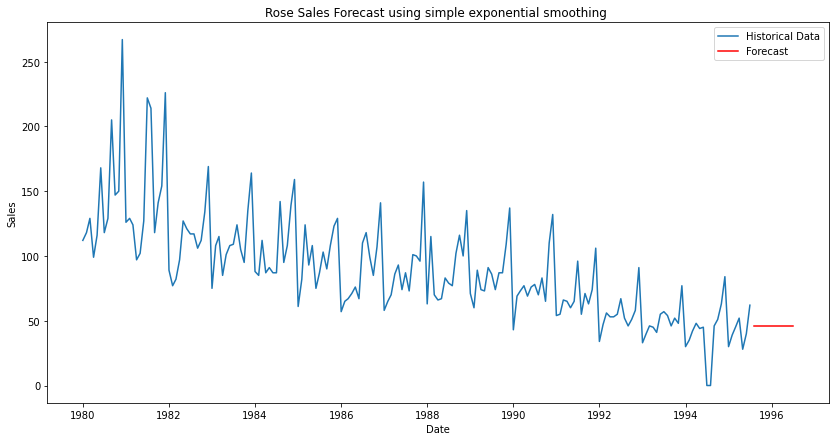

In [82]:
data = df.copy()
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Ensure the data has a frequency set (monthly start frequency)
data = data.asfreq('MS')

ses_model = SimpleExpSmoothing(data['Rose']).fit(smoothing_level=0.2)

# Forecast the next 12 months
ses_forecast = ses_model.forecast(12)
forecast = ses_forecast
forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_series1 = pd.Series(forecast, index=forecast_index)

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['Rose'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series1, label='Forecast', color='red')

# Add title and labels
plt.title('Rose Sales Forecast using simple exponential smoothing ')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

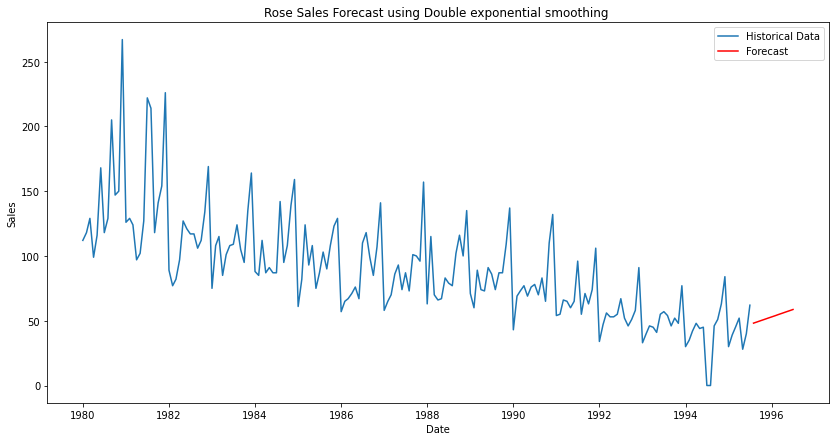

In [83]:
data = df.copy()
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Ensure the data has a frequency set (monthly start frequency)
data = data.asfreq('MS')

holt_model = Holt(data['Rose']).fit(smoothing_level=0.2, smoothing_trend=0.2)

# Forecast the next 12 months
holt_forecast = holt_model.forecast(12)
forecast = holt_forecast
forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_series2 = pd.Series(forecast, index=forecast_index)

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['Rose'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series2, label='Forecast', color='red')

# Add title and labels
plt.title('Rose Sales Forecast using Double exponential smoothing ')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

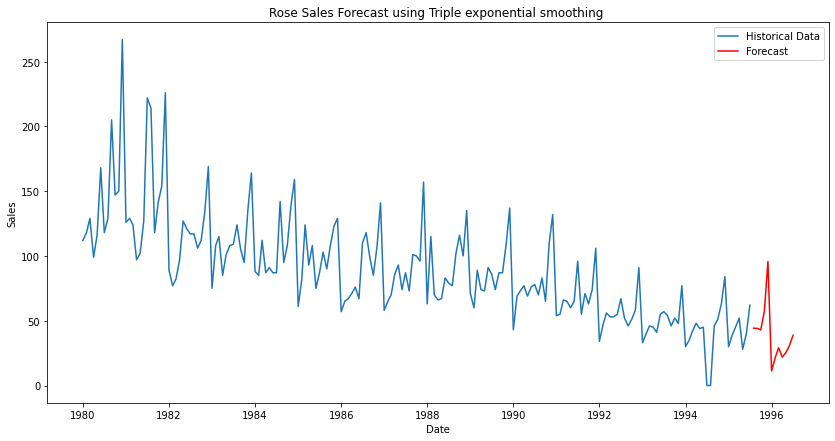

In [84]:
data = df.copy()
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Ensure the data has a frequency set (monthly start frequency)
data = data.asfreq('MS')

hw_model = ExponentialSmoothing(data['Rose'], seasonal_periods=12, trend='add', seasonal='add').fit()

# Forecast the next 12 months
hw_forecast = hw_model.forecast(12)
forecast = hw_forecast
forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_series3 = pd.Series(forecast, index=forecast_index)

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['Rose'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series3, label='Forecast', color='red')

# Add title and labels
plt.title('Rose Sales Forecast using Triple exponential smoothing ')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

In [85]:
print("\nHolt-Winters' Seasonal forecast:")
print(hw_forecast)


Holt-Winters' Seasonal forecast:
1995-08-01    44.237989
1995-09-01    44.110828
1995-10-01    42.861000
1995-11-01    57.474745
1995-12-01    95.751319
1996-01-01    11.259768
1996-02-01    21.578052
1996-03-01    29.157992
1996-04-01    21.892876
1996-05-01    25.333203
1996-06-01    30.971119
1996-07-01    38.682228
Freq: MS, dtype: float64


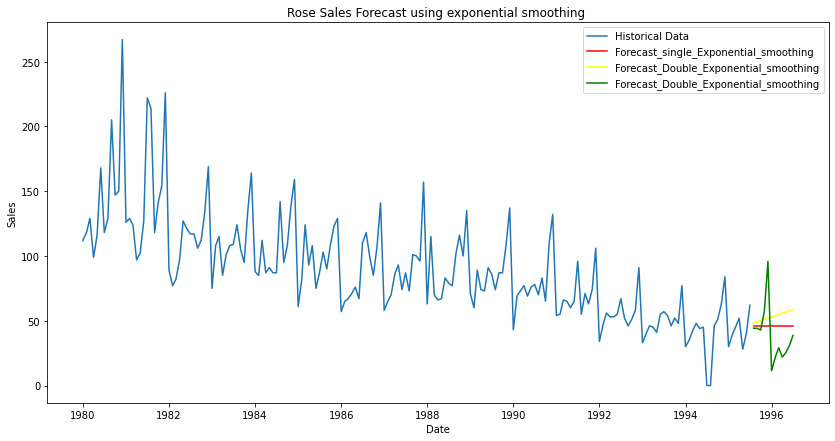

In [86]:
data = df.copy()
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Ensure the data has a frequency set (monthly start frequency)
data = data.asfreq('MS')
forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)


# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['Rose'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series1, label='Forecast_single_Exponential_smoothing', color='red')
plt.plot(forecast_series2, label='Forecast_Double_Exponential_smoothing', color='yellow')
plt.plot(forecast_series3, label='Forecast_Double_Exponential_smoothing', color='green')

# Add title and labels
plt.title('Rose Sales Forecast using exponential smoothing ')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

## Linear regression

Mean Squared Error (MSE): 882.3860893441819
R-squared (R2): 0.604179030422688
Intercept: 12165.426420576525
Coefficients: [-0.01664235]


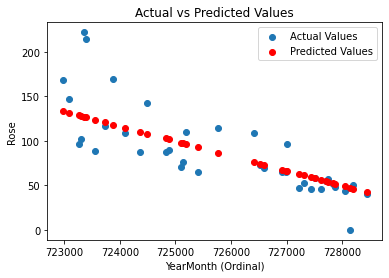

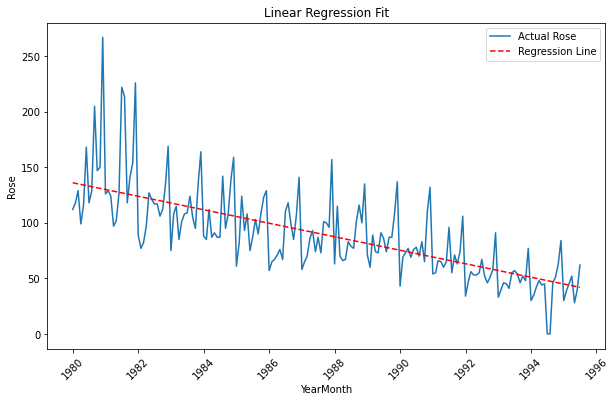

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


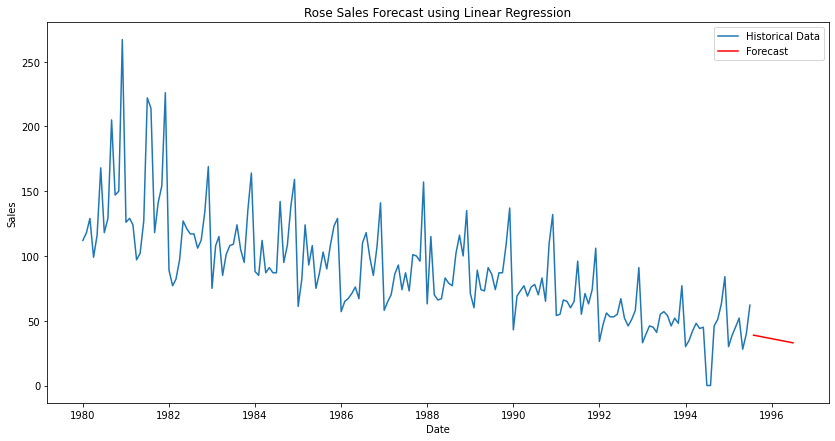

In [95]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
data = df.copy()
# Convert 'YearMonth' from string to datetime
data['YearMonth'] = pd.to_datetime(data['YearMonth'], format='%Y-%m')

# Convert 'YearMonth' to ordinal numbers
data['YearMonthOrdinal'] = data['YearMonth'].map(lambda date: date.toordinal())

# Define predictors (X) and target (y)
X = data[['YearMonthOrdinal']]  # Use 'YearMonthOrdinal' as predictor
y = data['Rose']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Display coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Plotting the predictions vs actual values
plt.scatter(X_test, y_test, label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('YearMonth (Ordinal)')
plt.ylabel('Rose')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.plot(data['YearMonth'], y, label='Actual Rose')
plt.plot(data['YearMonth'], model.predict(X), color='red', linestyle='--', label='Regression Line')
plt.xlabel('YearMonth')
plt.ylabel('Rose')
plt.title('Linear Regression Fit')
plt.xticks(rotation=45)
plt.legend()
plt.show()
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Ensure the data has a frequency set (monthly start frequency)
data = data.asfreq('MS')

# Feature Engineering: Convert 'YearMonth' to ordinal for model fitting
data['YearMonthOrdinal'] = data.index.map(lambda date: date.toordinal())

# Define predictors (X) and target (y)
X = data[['YearMonthOrdinal']]  # Use 'YearMonthOrdinal' as predictor
y = data['Rose']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create future dates for the next 12 months
future_dates = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

# Convert future dates to ordinal for prediction
future_ordinals = future_dates.map(lambda date: date.toordinal()).values.reshape(-1, 1)

# Forecast the next 12 months
forecast = model.predict(future_ordinals)

# Create a forecast series with the correct index
forecast_series = pd.Series(forecast, index=future_dates)

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['Rose'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series, label='Forecast', color='red')

# Add title and labels
plt.title('Rose Sales Forecast using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

In [92]:
data = df.copy()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


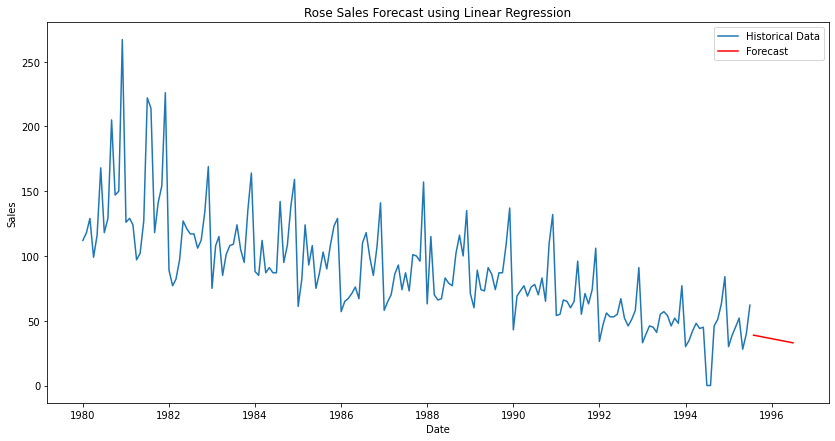

In [93]:
# Convert 'YearMonth' to datetime and set as index
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)

# Ensure the data has a frequency set (monthly start frequency)
data = data.asfreq('MS')

# Feature Engineering: Convert 'YearMonth' to ordinal for model fitting
data['YearMonthOrdinal'] = data.index.map(lambda date: date.toordinal())

# Define predictors (X) and target (y)
X = data[['YearMonthOrdinal']]  # Use 'YearMonthOrdinal' as predictor
y = data['Rose']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create future dates for the next 12 months
future_dates = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

# Convert future dates to ordinal for prediction
future_ordinals = future_dates.map(lambda date: date.toordinal()).values.reshape(-1, 1)

# Forecast the next 12 months
forecast = model.predict(future_ordinals)

# Create a forecast series with the correct index
forecast_series = pd.Series(forecast, index=future_dates)

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(data['Rose'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series, label='Forecast', color='red')

# Add title and labels
plt.title('Rose Sales Forecast using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

In [94]:
forecast

array([38.8590374 , 38.31103527, 37.78071064, 37.23270851, 36.70238388,
       36.15438175, 35.60637963, 35.09373248, 34.54573036, 34.01540572,
       33.4674036 , 32.93707896])